In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

Importando librerías:


In [3]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans

warnings.filterwarnings("ignore")

Abriendo el dataset de candy:


In [4]:
dataset = pd.read_csv("../data/candy.csv")

dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


Entrenamiento del modelo: En este punto debemos decidir cuántos clusters proponemos que debe encontrar el algoritmo de kmeans, adicionalmente al usar mini batches debemos indicar de cuál será el tamaño del batch.


In [5]:
# Al ser aprendizaje no supervisado, no separamos nuestro dataset en partes
# Eliminaremos los nombre de los caramelos, ya que eso no nos sirve para el algoritmo

X = dataset.drop("competitorname", axis=1)
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8)
kmeans.fit(X)

print("Total de centroides: ", len(kmeans.cluster_centers_))
print("=" * 64)
col_name = "clisters"
dataset[col_name] = kmeans.predict(X)
print(dataset)

Total de centroides:  4
                competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                    100 Grand          1       0        1               0   
1                 3 Musketeers          1       0        0               0   
2                     One dime          0       0        0               0   
3                  One quarter          0       0        0               0   
4                    Air Heads          0       1        0               0   
..                         ...        ...     ...      ...             ...   
80                   Twizzlers          0       1        0               0   
81                    Warheads          0       1        0               0   
82        WelchÕs Fruit Snacks          0       1        0               0   
83  WertherÕs Original Caramel          0       0        1               0   
84                    Whoppers          1       0        0               0   

    nougat  crispedricewafer  hard  bar

Gráfica de pares:


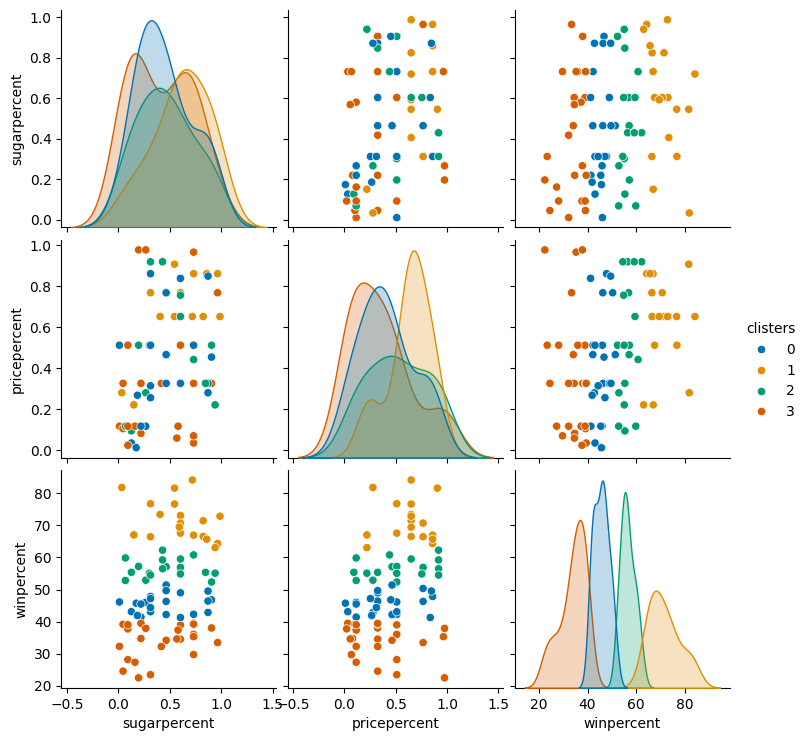

In [7]:
sns.pairplot(
    dataset[["sugarpercent", "pricepercent", "winpercent", col_name]],
    hue=col_name,
    palette="colorblind",
)

plt.show()

Se observan los 4 diferentes colores, ya que se eligieron 4 clusters. Se puede observar una clara clusterizacion cuando se compara respecto a winpercent las variables pricepercent, sugarpercent.
